In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

df = pd.read_excel('financial_source.xlsx',sheet_name='T2V')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Description  200 non-null    object        
 1   Date         200 non-null    datetime64[ns]
 2   Rate         200 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.8+ KB


In [17]:
def group_rank(rate):
    if rate > 0 and rate <=2:
        return "BAD"
    elif rate == 3: 
        return "GENERAL"
    else: 
        return "GOOD"
    
df['group_rank'] = df['Rate'].apply(group_rank)
df.head()

,Description,Date,Rate,group_rank
0,Law we fire story drive single yet.,2021-02-05,5,GOOD
1,Structure live training four investment.,2022-06-14,3,GENERAL
2,Five into care finish parent.,2022-12-20,1,BAD
3,Through information of each professional work.,2021-09-05,4,GOOD
4,Show now difference total learn image study co...,2020-10-10,2,BAD


In [18]:
group_ranks = df.groupby('group_rank').size()
group_ranks = group_ranks.reset_index(name='count')
group_ranks

,group_rank,count
0,BAD,79
1,GENERAL,30
2,GOOD,91


In [19]:
import plotly.express as px 

# Create a packed bubble chart
fig = px.sunburst(group_ranks, 
                  path=['group_rank'], 
                  values='count', 
                  title='Packed Bubble Chart of TTV Ranks',
                  )

fig.update_traces(hovertemplate='Count: %{value}<extra></extra>',insidetextfont=dict(color='white', size=15))
fig.update_layout(width=600, height=500)  # Set figure size (in pixels)

# Show the figure
fig.show()

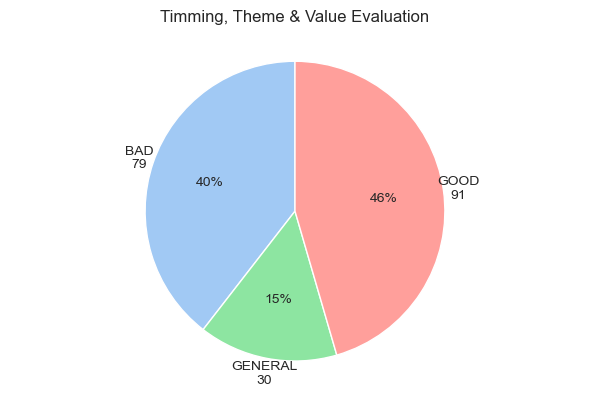

In [37]:
total_count = group_ranks['count'].sum()
group_ranks['percentage'] = (group_ranks['count'] / total_count) * 100

labels = [f"{group}\n{count:}" for group, count in zip(group_ranks['group_rank'], group_ranks['count'])]

colors = sns.color_palette("pastel6")
sns.set_style("whitegrid")

plt.figure(figsize=(6,4))
plt.pie(
group_ranks['percentage'],
labels=labels,
autopct='%1.0f%%', 
startangle=90,
colors=colors,
textprops={'ha': 'center'}
)
plt.axis('equal')

plt.suptitle('Timming, Theme & Value Evaluation')
plt.tight_layout()
plt.show()